In [7]:

import cytoflow as flow

# if your figures are too big or too small, you can scale them by changing matplotlib's DPI
import matplotlib
from scipy import stats
matplotlib.rc('figure', dpi = 160)
#https://github.com/cytoflow/cytoflow/blob/master/docs/examples-basic/Basic%20Cytometry.ipynb
#https://cytoflow.readthedocs.io/en/stable/user_manual/tutorials/tutorials.html#user-tutorials


import numpy as np
import pandas as pd
import skimage.io
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
import Colony_Analysis as ca


from skimage.color import rgb2gray
from skimage.transform import rotate

import scipy.stats as stats
from scipy.stats import  ttest_ind

Bottom_color=[106/255,213/255,255/255]
Middle_color=[64/255,150/255,234/255]
Top_color=[0/255,77/255,128/255]
WT_color=[64/255,150/255,234/255]
low_color= [255/255,100/255,78/255]
high_color= [181/255,23/255,0/255]
WT_color=[64/255,150/255,234/255]
edgecolor= [0/255,0/255,0/255]

Bottom_color=[106/255,213/255,255/255]
Middle_color=[64/255,150/255,234/255]
Top_color=[0/255,77/255,128/255]

alphabet={}

for i,L in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    alphabet[L] = i +1

In [8]:
#parse plate order:
order_path='/Users/paucac/Documents/PhD/CAB/CRISPA/FlowCytometry/16.3.22/16.3.22.csv'


order_plate1 = pd.read_csv(order_path, sep=';', skiprows=0)
order_plate1 = order_plate1.iloc[0:8,0:13]

data_path_plate1='/Users/paucac/Documents/PhD/CAB/CRISPA/FlowCytometry/16.3.22/plate1/'

#parse the name of the files
file_name_plate1={}
file_name_plate2={}

for filename in os.listdir(data_path_plate1):
    if '_Sample' in filename:
        i = filename.index('_Sample') 
        row=alphabet[filename[0]]
        col= int(filename[1:i])
        file_name_plate1[(row,col)]= data_path_plate1+ filename



'''CCM_conc_dict= {0:0, 1:710.5/800, 2:710.5/80, 3:710.5/8, 4:710.5/4, 5:710.5/2, 6:710.}  #mg.L-1
Pathway = {'C-':'0', '9':'AroyB-wt', '10':'AroyB-P146T', '11':'0', '12':'0', '13':'AroyB-wt' ,'14':'AroyB-P146T' ,'15':'AroyB-wt', '16':'AroyB-P146T',
           '17':'AroyB-wt','18':'AroyB-wt','19':'AroyB-P146T','20':'AroyB-P146T',
           '21':'AroyB-wt', '22':'AroyB-wt', '23':'AroyB-P146T','24':'AroyB-P146T', '28':'AroyB-P146T'}

Sensor  = {'C-':'0', '9':'0', '10':'0', '11':'BenM_wt', '12':'BenM-MP15D08', '13':'BenM_wt' ,'14':'BenM_wt' ,'15':'BenM-MP15D08', '16':'BenM-MP15D08',
          '17':'BenM_wt','18':'BenM_wt','19':'BenM_wt','20':'BenM_wt','21':'BenM-MP15D08', '22':'BenM-MP15D08', '23':'BenM-MP15D08','24':'BenM-MP15D08',
          '28':'BenM-MP15D08' }

KO ={'C-':'0', '9':'0', '10':'0', '11':'0', '12':'0', '13':'0' ,'14':'0' ,'15':'0', '16':'0',
     '17':'ZWF1', '18':'TAL1', '19':'ZWF1', '20':'TAL1',  '21':'ZWF1', '22':'TAL1' ,  '23':'ZWF1', '24':'TAL1','28':'ARO2'}
           
    '''
CCM_conc_dict= {0:0, 1:710.5/800, 2:710.5/80, 3:710.5/8, 4:710.5/4, 5:710.5/2, 6:710.}  #mg.L-1
  
Pathway = {'C-':'0','0':'0','03':'0','04':'0','05':'AroyB', '06':'AroyB*','07':'AroyB','08':'AroyB*',
           '09':'Aroy', '10':'AroyB*', '11':'0', '12':'0', '13':'AroyB' ,'14':'AroyB*' ,
           '15':'Aroy', '16':'AroyB*',
           '17':'Aroy','18':'Aroy','19':'AroyB*','20':'AroyB*',
           '21':'Aroy', '22':'Aroy', '23':'AroyB*','24':'AroyB*',
              '25':'Aroy', '26':'AroyB*','27':'Aroy','28':'AroyB*'}

Sensor  = {'C-':'0','00':'0','03':'BenM','04':'BenM*','05':'BenM',  '06':'BenM','07':'BenM*','08':'BenM*',
           '09':'0', '10':'0', '11':'BenM', '12':'BenM*', '13':'BenM' ,'14':'BenM' ,'15':'BenM*', '16':'BenM*',
          '17':'BenM','18':'BenM','19':'BenM','20':'BenM','21':'BenM*', '22':'BenM*', '23':'BenM*','24':'BenM*',
           '25':'BenM', '26':'BenM','27':'BenM*', '28':'BenM*'}


KO ={'C-':'0', '03':'0','04':'0','05':'0','06':'0','07':'0','08':'0',
     '09':'0', '10':'0', '11':'0', '12':'0', '13':'0' ,'14':'0' ,'15':'0', '16':'0',
     '17':'ZWF1', '18':'TAL1', '19':'ZWF1', '20':'TAL1',  '21':'ZWF1', '22':'TAL1' ,  '23':'ZWF1', '24':'TAL1',
    '25':'ARO2', '26':'ARO2','27':'ARO2', '28':'ARO2'}
Background ={ '03':'DS','04':'DS','05':'DS','06':'DS','07':'DS','08':'DS','C-':'BY',
            '09':'BY', '10':'BY', '11':'BY', '12':'BY', '13':'BY' ,'14':'BY' ,'15':'BY', '16':'BY',
          '17':'BY','18':'BY','19':'BY','20':'BY','21':'BY', '22':'BY', '23':'BY','24':'BY',
            '25':'BY', '26':'BY','27':'BY', '28':'BY'}

In [9]:
%%time
tubes ={}
check ={}

t=0

#we add the final row on the other plate as row 9
for (r,c), path in file_name_plate1.items():
    
    #print( order_plate1.iloc[r-1][c])
    strain= order_plate1.iloc[r-1][c][0:8] 
    replicate = order_plate1.iloc[r-1][c][8]
    ## CCM level
    if len(order_plate1.iloc[r-1][c])>9:
        level= str(order_plate1.iloc[r-1][c][-1])
    else:
        level= 0
    
    pathway=Pathway[str(strain[-2:])]
    sensor=Sensor[str(strain[-2:])]
   

    tubes[t]=flow.Tube(file = path ,conditions = { 'Strain': strain, 'CCM': level, 'Replicate': replicate,
                                                      'Pathway':pathway, 'Sensor':sensor})
    t+=1
  

tubes= [tubes[t] for t in tubes.keys()]     
import_op = flow.ImportOp(conditions = {'Strain': 'str','CCM': 'float','Replicate':'str','Pathway':'str','Sensor':'str' }, tubes = tubes, events=12000)
plate1 = import_op.apply()


CPU times: user 1min 8s, sys: 5.32 s, total: 1min 13s
Wall time: 1min 14s


In [10]:
#gate plate1
#apply size threshold to remove debris
thresh = flow.ThresholdOp(name = "Size",
                          channel = "FSC-A",
                          threshold = 7*10e4)
plate1Gated = thresh.apply(plate1)

#flow.HistogramView(channel = "FSC-A",
#                scale = "log",
#                yfacet = 'Strain',
#                huefacet='Size').plot(plate1Gated)



/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/ColonyAnalysisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator


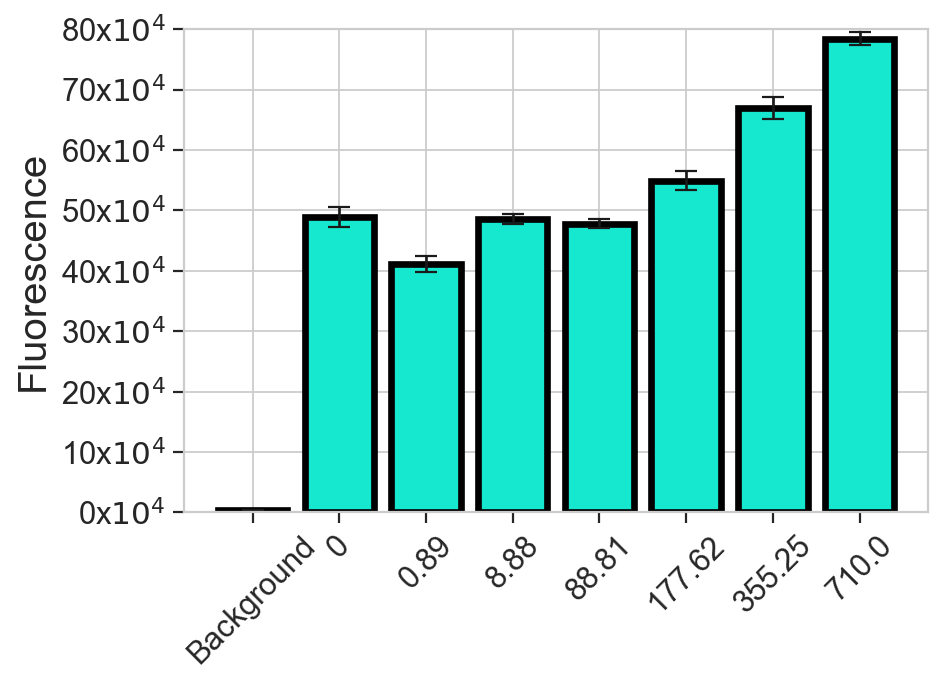

In [13]:
#plot Fluorescence Results
#choose plate
ex= plate1Gated
sensor_color=[22/255,231/255,207/255]
producer_color=[64/255,150/255,234/255]
edgecolor= [0/255,0/255,0/255]

X=[]
Y=[]
Yerr=[]
colors=[]
tick_names =[]

metric='B525-A'
##add the control without fluorescent protein
strain = 'BY4741C-'
CCM =0
ABC=[]
for replicate in ['A','B','C']:
    i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True) & (ex.data['CCM'] == 0)  & (ex.data['Replicate'] == replicate)
    ABC.append(ex.data[i2plot][metric].mean())
Y.append(ABC)  
tick_names.append('Background')
colors.append(producer_color)

strain = 'ScCCM012' ## BenM(MP17_D08) strain at different [CCM]
metric='B525-A'
for i, CCM in CCM_conc_dict.items():
    ABC=[]
    for replicate in ['A','B','C']:
        i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True) & (ex.data['CCM'] == i)  & (ex.data['Replicate'] == replicate)
        
        ABC.append(ex.data[i2plot][metric].mean())
    X.append(CCM)
    colors.append(sensor_color)
    Y.append(ABC)
    tick_names.append(str(np.round(CCM_conc_dict[i],2))) 

#[tick_names.append(str(np.round(CCM_conc_dict[i],2))) for i in range(7)]
#tick_names=[str(CCM_conc_dict[i]) for i in range(7)]

Y = np.stack(Y)
fig, ax = plt.subplots()


ax.bar(np.arange(len(Y)),Y.mean(axis=1),yerr=Y.std(axis=1), 
       color=colors,edgecolor=edgecolor,capsize=5,linewidth =3)
'''
tick_loc = np.arange(10)
ax.xaxis.set_ticks(tick_loc)
ax.set_title('BenM(MP17_D08)  induction curve')
ax.set_xticklabels(tick_names,rotation = 45)
ax.set_ylabel('Fluorescence')
ax.set_ylim([0.1*10e5,1.7*10e5 ])
'''

tick_loc = np.arange(8)
ax.xaxis.set_ticks(tick_loc)
#ax.set_title('BenM*  induction curve',fontsize=18)

ax.set_xticklabels(tick_names,rotation = 45, size=14)
ax.set_ylabel('Fluorescence',fontsize=18)
#ax.set_ylim([0.0*10e5,np.log10(0.42*10e5) ])
#ax.set_ylim([3.5,5.5 ])
ax.set_ylim([0.0*10e5,0.8*10e5 ])

ylabels = ax.get_yticks()
ylabels = [int(y)/10000 for y in ylabels]
ylabels= [str(int(y)) + 'x$10^4$' for y in ylabels]
ax.set_yticklabels(ylabels, size=14)
plt.show()


In [15]:
#Compute significance P.values

print(X[2],stats.ttest_ind(Y[1].flatten(), Y[2], equal_var=True))
#the first 4 CCM conc are not significance we pool them and look at each conc in comparison to the pool
for i in range(1,8):
    print(X[i-1],stats.ttest_ind(Y[1:5].flatten(), Y[i], equal_var=True))


8.88125 Ttest_indResult(statistic=5.086790040264186, pvalue=0.007047226292792672)
0 Ttest_indResult(statistic=-1.0656204904364257, pvalue=0.30598721726453176)
0.888125 Ttest_indResult(statistic=2.5426720700712067, pvalue=0.024530252009974596)
8.88125 Ttest_indResult(statistic=-0.9071582828242729, pvalue=0.38083127065439637)
88.8125 Ttest_indResult(statistic=-0.5763059186438673, pvalue=0.5742513168117742)
177.625 Ttest_indResult(statistic=-3.8482856697048726, pvalue=0.00201406474073704)
355.25 Ttest_indResult(statistic=-9.381254874346196, pvalue=3.7555443221276846e-07)
710.0 Ttest_indResult(statistic=-14.935428888999512, pvalue=1.4559729057396305e-09)


## load HPLC data from 28.8.22

In [57]:
#For the HPLC bio replicate of figure 2B we use strains ScCCM13 and ScCCM14
#>> they have the same pathways and just a different biosensor version
#Sc_CCM013	BenM AroyB - YKO
#Sc_CCM014	BenM AroyB P146T -YKO
#Sc_CCM015	BenM( MP17_D08) AroyB -YKO
#Sc_CCM016	BenM( MP17_D08) AroyB P146T- YKO

In [16]:
##
data_path= '/Users/paucac/Documents/PhD/CAB/CRISPA/FlowCytometry/28.8.22_FACS_HPLC/'
Data_CCM=pd.read_excel(data_path+ 'HPLC28.8.22.xlsx', skiprows=6,sheet_name='CCM' ).astype(str)
#Data=Data.iloc[8:,:]
Data_CCM=Data_CCM.replace('n.a.',0)

# the samples were diluted 8X during sample prep. We remultiply back X8
back_dilute=8

Data_CCM

No.  Injection Name              Ret.Time                  Area  \
0    nan              _                   min               mAU*min   
1    nan              _              UV_VIS_1              UV_VIS_1   
2    nan              _  Cis Cis Muconic Acid  Cis Cis Muconic Acid   
3    1.0          BLANK                     0                     0   
4    2.0          BLANK                     0                     0   
..   ...            ...                   ...                   ...   
88  86.0         Facs6b                     0                     0   
89  87.0         Facs1c                     0                     0   
90  88.0         Facs3c                     0                     0   
91  89.0         Facs5c                     0                     0   
92  90.0         Facs6c                     0                     0   

                  Height                Amount             Rel.Area   \
0                    mAU                   nan                     %   
1               UV_VIS_1              UV_VIS_1              UV_VIS_1   
2   Cis Cis Muconic Acid  Cis Cis Muconic Acid  Cis Cis Muconic Acid   
3                      0                     0                     0   
4                      0                     0                     0   
..                   ...                   ...                   ...   
88                     0                     0                     0   
89                     0                     0                     0   
90                     0                     0                     0   
91                     0                     0                     0   
92                     0                     0                     0   

              Peak Type   
0                    nan  
1               UV_VIS_1  
2   Cis Cis Muconic Acid  
3                      0  
4                      0  
..                   ...  
88                     0  
89                     0  
90                     0  
91                     0  
92                     0  

[93 rows x 8 columns]

/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/ColonyAnalysisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/ColonyAnalysisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator


Ttest_indResult(statistic=-2.1803032707083743, pvalue=0.09471239509958909)
Ttest_indResult(statistic=-7.322917905442141, pvalue=0.0018503918043361893)


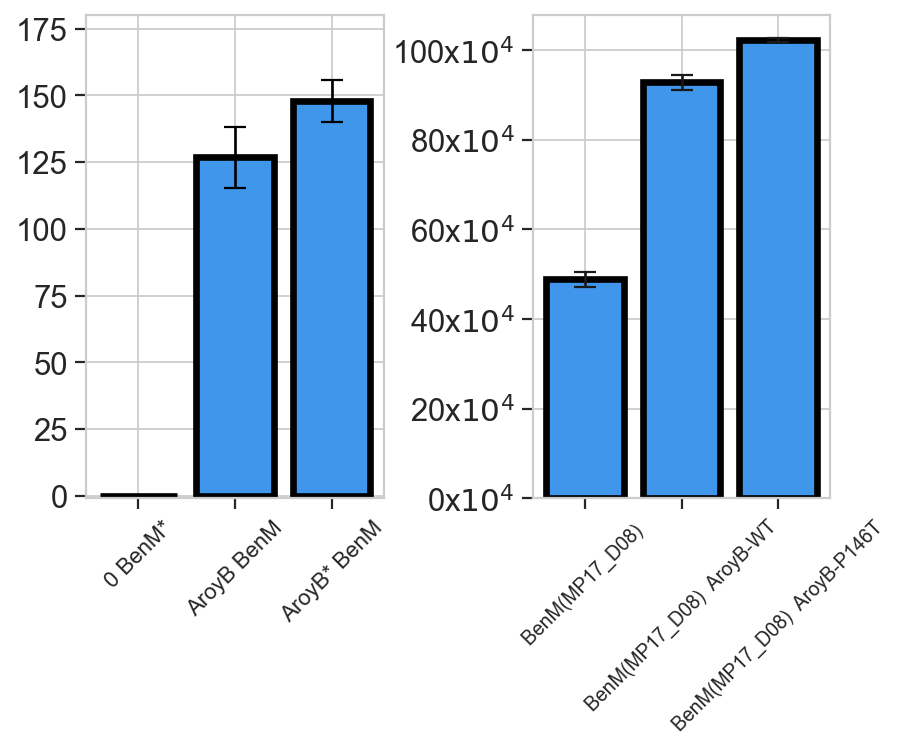

In [18]:
## plot HPLC data
X_HPLC=[]
Y_HPLC=[]
for s in [ 12,13,14]:#4,  3,5,6,4,7,8
    s= str(s)
    i= Data_CCM['Injection Name'].str.match(str(s)+'\w')
    X_HPLC.append(Pathway[s]+' '+Sensor[s])
    y =Data_CCM['Amount'][i].values.astype(str)
    #this one liner replaces commas to dots 
    y = [s.replace(',','.') if ',' in s else s for s in y ]

    Y_HPLC.append(y)
Y_HPLC = np.stack(Y_HPLC).astype(float)*back_dilute

fig, axs = plt.subplots(1,2,figsize=(6,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
axs = axs.flatten()
default_color=[64/255,150/255,234/255]
edgecolor= [0,0,0]
axs[0].bar(np.arange(Y_HPLC.shape[0]) ,Y_HPLC.mean(axis=1),yerr=Y_HPLC.std(axis=1),
       color=default_color,edgecolor= edgecolor,linewidth=3,ecolor=edgecolor,capsize=5)
axs[0].xaxis.set_ticks(np.arange(Y_HPLC.shape[0]))
axs[0].tick_params(axis='both', which='major', labelsize=5)
#axs[0].set_ylabel('CCM (mg/L)')
axs[0].set_xticklabels(X_HPLC,rotation = 45, size=10)

axs[0].tick_params(axis='y',labelsize=10)
#axs[0].set_title('HPLC')
axs[0].set_ylim([-1,180 ])
ylabels = axs[0].get_yticks()
ylabels = [str(int(y)) for y in ylabels]
axs[0].set_yticklabels(ylabels, size=14)





Y_Flow=[]

colors =[]
tick_names=[]

##add the BenM AroyB-WT strain
strain = 'ScCCM012'
CCM =0
ABC=[]
for replicate in ['A','B','C']:
    i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True) & (ex.data['CCM'] == 0)  & (ex.data['Replicate'] == replicate)
    ABC.append(ex.data[i2plot][metric].mean())
Y_Flow.append(ABC) 
colors.append(producer_color)
tick_names.append('BenM(MP17_D08) ')


##add the BenM AroyB-WT strain
strain = 'ScCCM015'
CCM =0
ABC=[]
for replicate in ['A','B','C']:
    i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True) & (ex.data['CCM'] == 0)  & (ex.data['Replicate'] == replicate)
    ABC.append(ex.data[i2plot][metric].mean())
Y_Flow.append(ABC) 
colors.append(producer_color)
tick_names.append('BenM(MP17_D08)  AroyB-WT')

##add the BenM AroyB-P146T strain
strain = 'ScCCM016'
CCM =0
ABC=[]
for replicate in ['A','B','C']:
    i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True) & (ex.data['CCM'] == 0)  & (ex.data['Replicate'] == replicate)
    ABC.append(ex.data[i2plot][metric].mean())
Y_Flow.append(ABC)  
tick_names.append('BenM(MP17_D08)  AroyB-P146T')
colors.append(producer_color)

Y_Flow = np.stack(Y_Flow)



axs[1].bar(np.arange(len(Y_Flow)),Y_Flow.mean(axis=1),yerr=Y_Flow.std(axis=1), 
       color=colors,edgecolor=edgecolor,capsize=5,linewidth =3)

tick_loc = np.arange(3)

axs[1].xaxis.set_ticks(tick_loc)
#axs[1].set_title('Flow Cytometry')
axs[1].set_xticklabels(tick_names,rotation = 45)
#axs[1].set_ylabel('Fluorescence (AU)')
ylabels = axs[1].get_yticks()
ylabels = [int(y)/10000 for y in ylabels]
ylabels= [str(int(y)) + 'x$10^4$' for y in ylabels]
axs[1].set_yticklabels(ylabels, size=14)

t,p = stats.ttest_ind(a=Y_HPLC[1], b=Y_HPLC[2], equal_var=True)
print('HPLC:',np.round(t,4),np.round(p,4))

t,p = stats.ttest_ind(a=Y_Flow[1], b=Y_Flow[2], equal_var=True)
print('flow:',np.round(t,4),np.round(p,4))


## plot repeat of ARO2 KO Flow cyto and HPLC

In [22]:
##
data_path= '/Users/paucac/Documents/PhD/CAB/CRISPA/FlowCytometry/28.8.22_FACS_HPLC/'
Data_CCM=pd.read_excel(data_path+ 'HPLC28.8.22.xlsx', skiprows=6,sheet_name='CCM' ).astype(str)
#Data=Data.iloc[8:,:]
Data_CCM=Data_CCM.replace('n.a.',0)

# the samples were diluted 8X during sample prep. We remultiply back X8
back_dilute=8

Data_CCM

No.  Injection Name              Ret.Time                  Area  \
0    nan              _                   min               mAU*min   
1    nan              _              UV_VIS_1              UV_VIS_1   
2    nan              _  Cis Cis Muconic Acid  Cis Cis Muconic Acid   
3    1.0          BLANK                     0                     0   
4    2.0          BLANK                     0                     0   
..   ...            ...                   ...                   ...   
88  86.0         Facs6b                     0                     0   
89  87.0         Facs1c                     0                     0   
90  88.0         Facs3c                     0                     0   
91  89.0         Facs5c                     0                     0   
92  90.0         Facs6c                     0                     0   

                  Height                Amount             Rel.Area   \
0                    mAU                   nan                     %   
1               UV_VIS_1              UV_VIS_1              UV_VIS_1   
2   Cis Cis Muconic Acid  Cis Cis Muconic Acid  Cis Cis Muconic Acid   
3                      0                     0                     0   
4                      0                     0                     0   
..                   ...                   ...                   ...   
88                     0                     0                     0   
89                     0                     0                     0   
90                     0                     0                     0   
91                     0                     0                     0   
92                     0                     0                     0   

              Peak Type   
0                    nan  
1               UV_VIS_1  
2   Cis Cis Muconic Acid  
3                      0  
4                      0  
..                   ...  
88                     0  
89                     0  
90                     0  
91                     0  
92                     0  

[93 rows x 8 columns]

In [20]:
Y_YKO

array([[159.216, 177.536, 167.24 ],
       [303.304, 336.896, 339.304]])

HPLC t,p : -12.4103 0.00024236


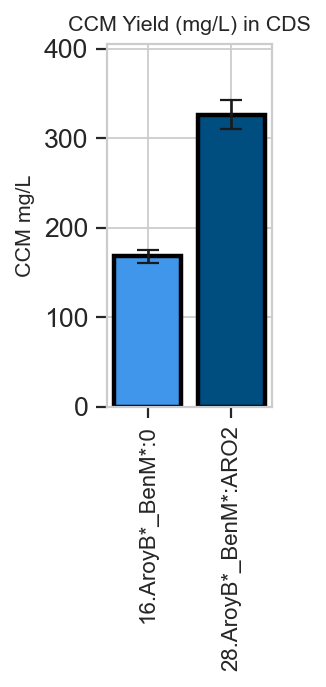

In [24]:

# the samples were diluted 10X during sample prep. We remultiply back X10
X_YKO=[]
Y_YKO=[]
colors =[ ]
for s in [ 16,28]:#4,  3,5,6,4,7,8
    s=str(s)
    i= Data_CCM['Injection Name'].str.match(str(s)+'\w')
    label= str(s)+'.'+Pathway[s]+'_'+Sensor[s]+':'+KO[s]
    X_YKO.append(label)
    y =Data_CCM['Amount'][i].values.astype(str)
    #this one liner replaces commas to dots 
    y = [s.replace(',','.') if ',' in s else s for s in y ]
    Y_YKO.append(y)


colors =[WT_color,Top_color]
        
Y_YKO = np.stack(Y_YKO).astype(float)*back_dilute

fig, ax = plt.subplots(figsize=(4/3,3))






ax.bar(np.arange(Y_YKO.shape[0]) ,Y_YKO.mean(axis=1),yerr=Y_YKO.std(axis=1),
       color=colors,edgecolor=edgecolor,capsize=5,linewidth =2)
ax.xaxis.set_ticks(np.arange(Y_YKO.shape[0]))
ax.tick_params(axis='both', which='major', labelsize=5)
ax.set_ylabel('CCM mg/L')
ax.set_xticklabels(X_YKO,rotation = 90, size=10)

ax.tick_params(axis='y',labelsize=12)

ax.set_title('CCM Yield (mg/L) in CDS')
ax.set_ylim([0,405])

t,p = stats.ttest_ind(a=Y_YKO[0,:], b=Y_YKO[1,:], equal_var=True)
print('HPLC t,p :',np.round(t,4),np.round(p,8))


## Now plot the flow_cytometry repeat

In [ ]:
#code from CCM_FACS.ipynb

In [66]:
#parse plate order:
order_path='/Users/paucac/Documents/PhD/CAB/CRISPA/FlowCytometry/28.8.22_FACS_HPLC/FACS_X.8.22.csv'



order_plate2 = pd.read_csv(order_path, sep=',', skiprows=11)
order_plate2 = order_plate2.iloc[0:8,0:13]
order_plate2

Plate2          1          2          3          4          5          6  \
0      A          0          5          4          3          2          1   
1      B  ScCCM004C  ScCCM005A  ScCCM005B  ScCCM005C  ScCCM006A  ScCCM006B   
2      C  ScCCM008C  ScCCM011A  ScCCM011B  ScCCM011C  ScCCM012A  ScCCM012B   
3      D  ScCCM014C          0          5          4          3          2   
4      E  ScCCM016B  ScCCM016C  ScCCM017A  ScCCM017B  ScCCM017C  ScCCM019A   
5      F  ScCCM023B  ScCCM023C  ScCCM025A  ScCCM025B  ScCCM025C  ScCCM026A   
6      G  ScCCM028B  ScCCM028C  BY4741C-A  BY4741C-B  BY4741C-C        NaN   
7      H        NaN        NaN        NaN        NaN        NaN        NaN   

           7          8          9         10         11         12  
0          0  ScCCM003A  ScCCM003B  ScCCM003C  ScCCM004A  ScCCM004B  
1  ScCCM006C  ScCCM007A  ScCCM007B  ScCCM007C  ScCCM008A  ScCCM008B  
2  ScCCM012C  ScCCM013A  ScCCM013B  ScCCM013C  ScCCM014A  ScCCM014B  
3          1          0  ScCCM015A  ScCCM015B  ScCCM015C  ScCCM016A  
4  ScCCM019B  ScCCM019C  ScCCM021A  ScCCM021B  ScCCM021C  ScCCM023A  
5  ScCCM026B  ScCCM026C  ScCCM027A  ScCCM027B  ScCCM027C  ScCCM028A  
6        NaN        NaN        NaN        NaN        NaN        NaN  
7        NaN        NaN        NaN        NaN        NaN        NaN

In [73]:
data_path_plate2 = '/Users/paucac/Documents/PhD/CAB/CRISPA/FlowCytometry/28.8.22_FACS_HPLC/72H/Plate2/'
for filename in os.listdir(data_path_plate2):
    if '_Sample' in filename:
        i = filename.index('_Sample') 
        row=alphabet[filename[0]]
        col= int(filename[1:i])
        file_name_plate2[(row,col)]= data_path_plate2+ filename

In [74]:
tubes ={}
check ={}
t=0
for (r,c), path in file_name_plate2.items():

    #strain name
    strain= order_plate2.iloc[r-1][c][0:8] 

    replicate = order_plate2.iloc[r-1][c][8]
    

    ## CCM level
    if len(order_plate2.iloc[r-1][c])>9:
        level= str(order_plate2.iloc[r-1][c][-1])
    else:
        level= str(0)
    strain_num = str(strain[-2:])
    
    pathway=Pathway[strain_num ]
    sensor=Sensor[strain_num]
    ko = KO[strain_num]
    background = Background[strain_num]
  #  print(strain, pathway, sensor , ko)
    tubes[t]=flow.Tube(file = path ,conditions = { 'Strain': strain, 'CCM': level, 'Replicate': replicate,
                                                      'Pathway':pathway, 'Sensor':sensor, 'Background':background})
    check[t]=[strain,level,replicate,pathway,sensor]
    t+=1
    
    
tubes= [tubes[t] for t in tubes.keys()]     
import_op = flow.ImportOp(conditions = {'Strain': 'str','CCM': 'str','Replicate':'str','Pathway':'str','Sensor':'str','Background':'str'  }, tubes = tubes, events=12000)
plate2 = import_op.apply()





In [80]:
thresh = flow.ThresholdOp(name = "Size",
                          channel = "FSC-A",
                          threshold = 5*10e4)

plate2Gated = thresh.apply(plate2)




(Strain=='BY4741C-')&(CCM=='0')&(Pathway=='0')&(Sensor=='0')


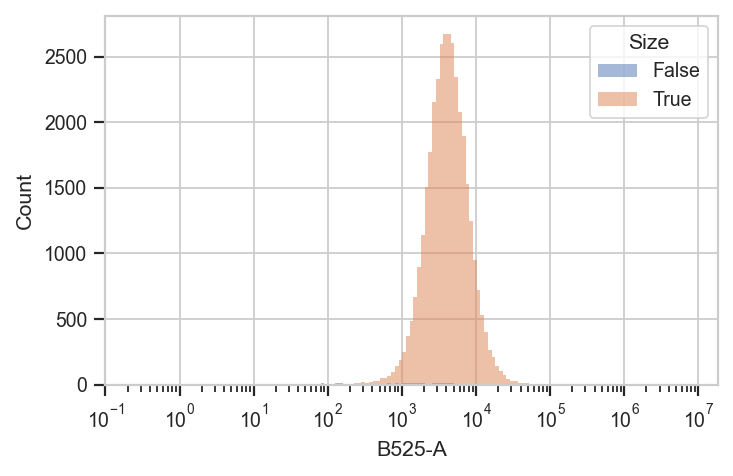

(Strain=='ScCCM003')&(CCM=='0')&(Pathway=='0')&(Sensor=='BenM')


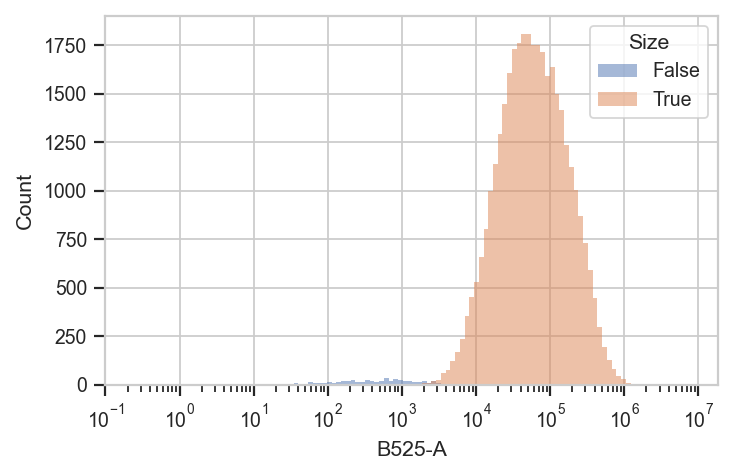

(Strain=='ScCCM004')&(CCM=='0')&(Pathway=='0')&(Sensor=='BenM*')


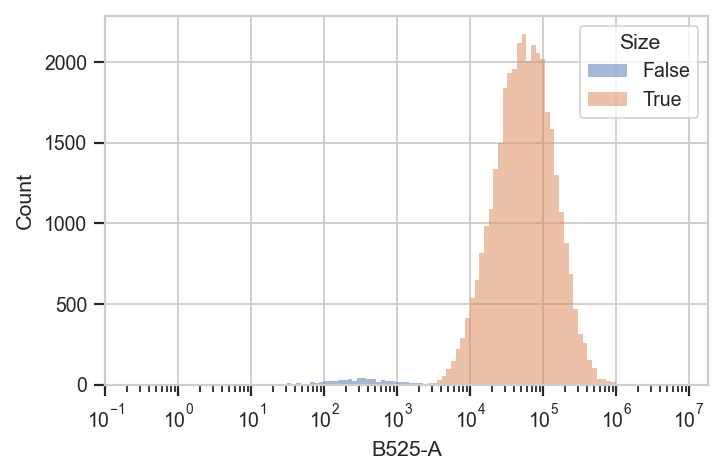

(Strain=='ScCCM005')&(CCM=='0')&(Pathway=='AroyB')&(Sensor=='BenM')


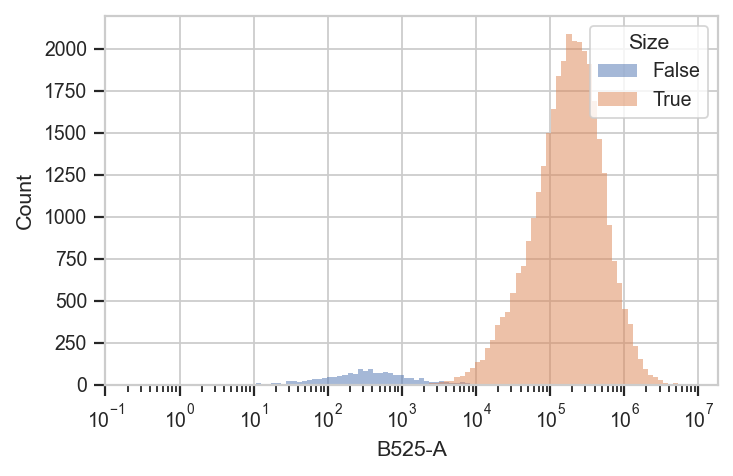

(Strain=='ScCCM006')&(CCM=='0')&(Pathway=='AroyB*')&(Sensor=='BenM')


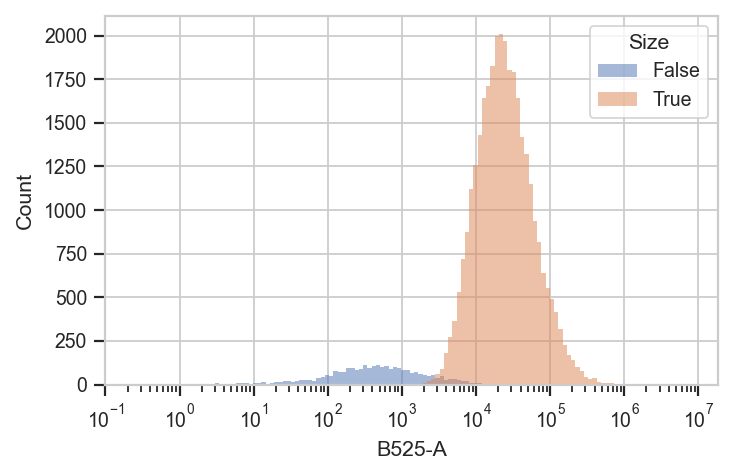

(Strain=='ScCCM007')&(CCM=='0')&(Pathway=='AroyB')&(Sensor=='BenM*')


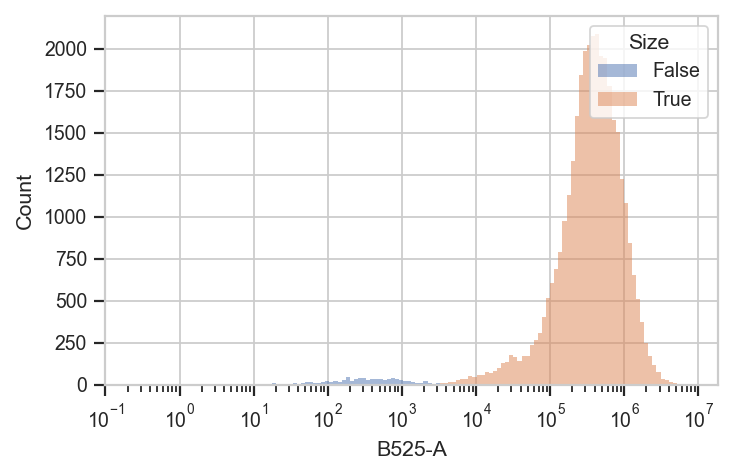

(Strain=='ScCCM008')&(CCM=='0')&(Pathway=='AroyB*')&(Sensor=='BenM*')


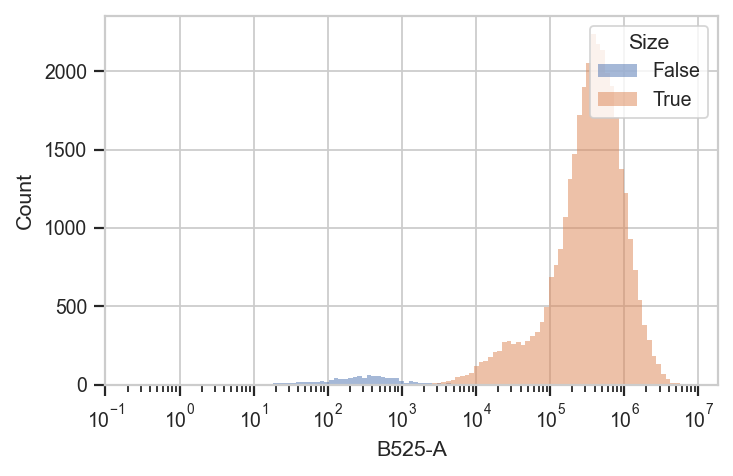

(Strain=='ScCCM011')&(CCM=='0')&(Pathway=='0')&(Sensor=='BenM')


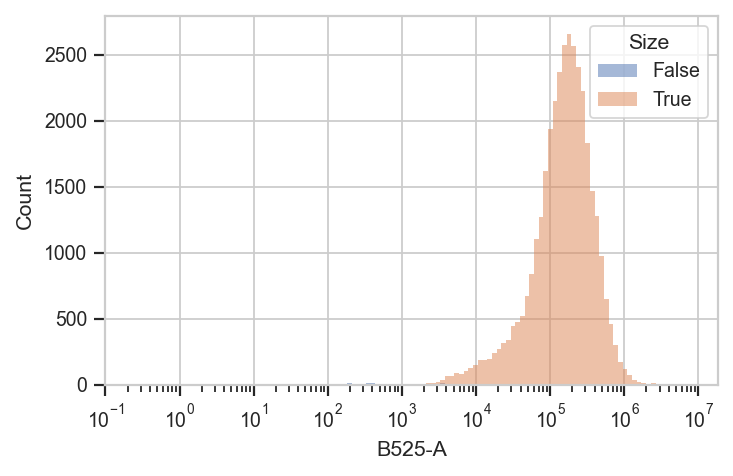

(Strain=='ScCCM012')&(CCM=='0')&(Pathway=='0')&(Sensor=='BenM*')


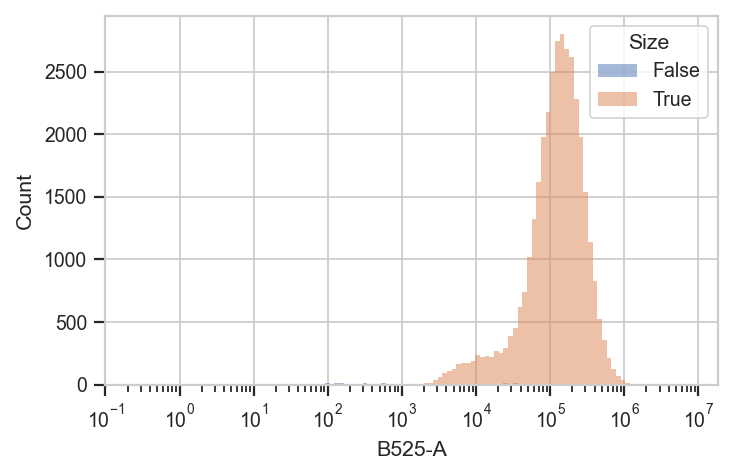

(Strain=='ScCCM013')&(CCM=='0')&(Pathway=='AroyB')&(Sensor=='BenM')


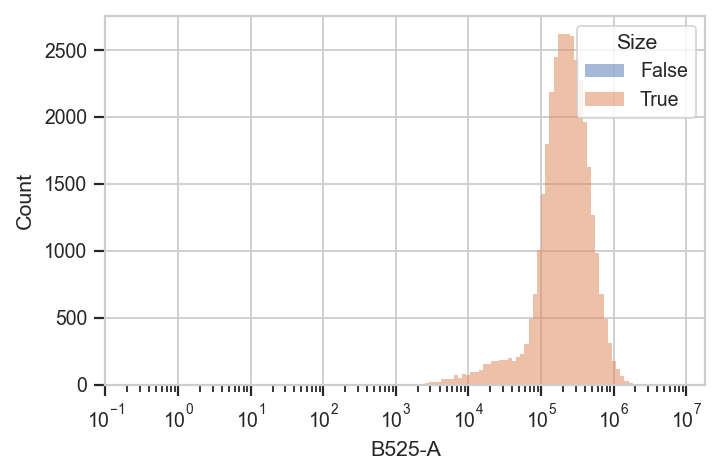

(Strain=='ScCCM014')&(CCM=='0')&(Pathway=='AroyB*')&(Sensor=='BenM')


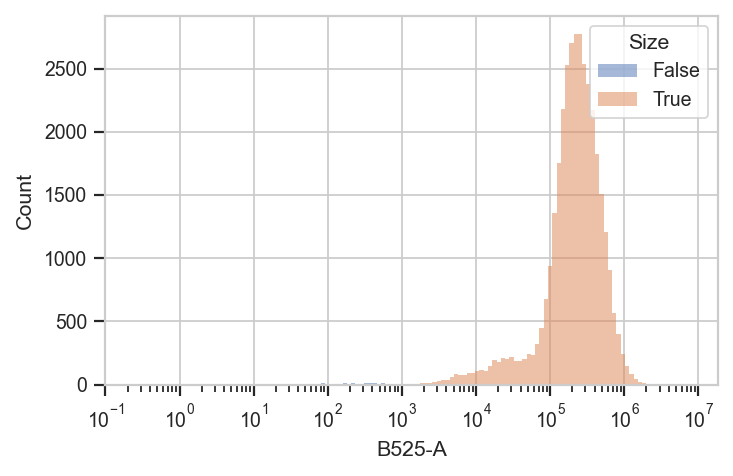

(Strain=='ScCCM015')&(CCM=='0')&(Pathway=='Aroy')&(Sensor=='BenM*')


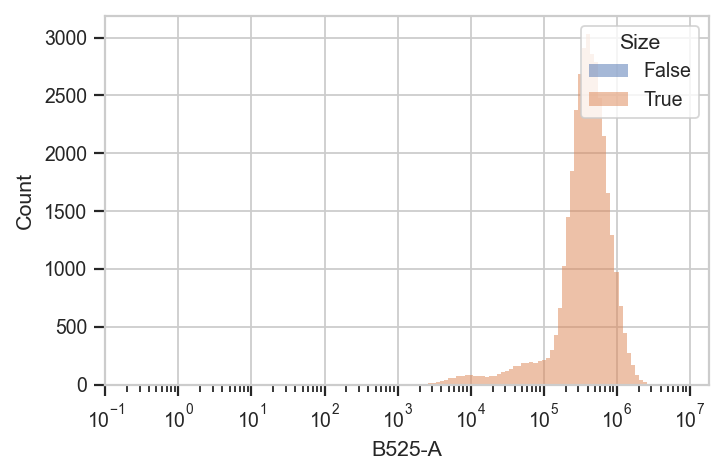

(Strain=='ScCCM016')&(CCM=='0')&(Pathway=='AroyB*')&(Sensor=='BenM*')


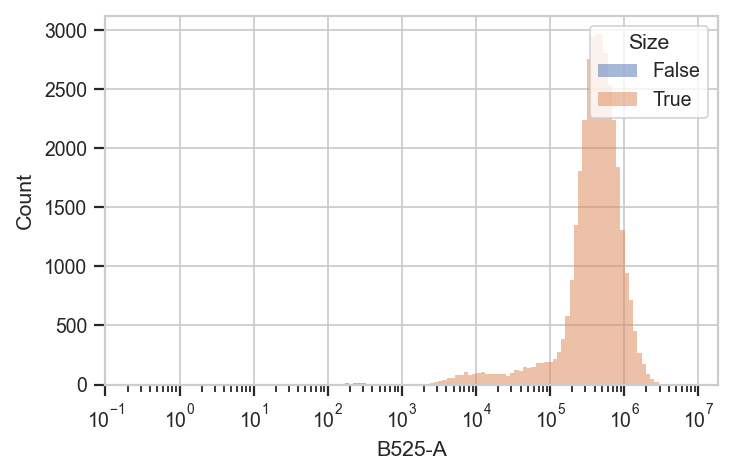

(Strain=='ScCCM017')&(CCM=='0')&(Pathway=='Aroy')&(Sensor=='BenM')


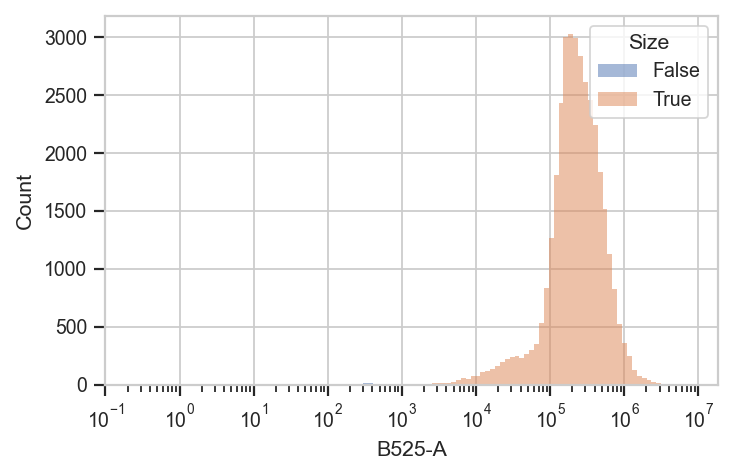

(Strain=='ScCCM019')&(CCM=='0')&(Pathway=='AroyB*')&(Sensor=='BenM')


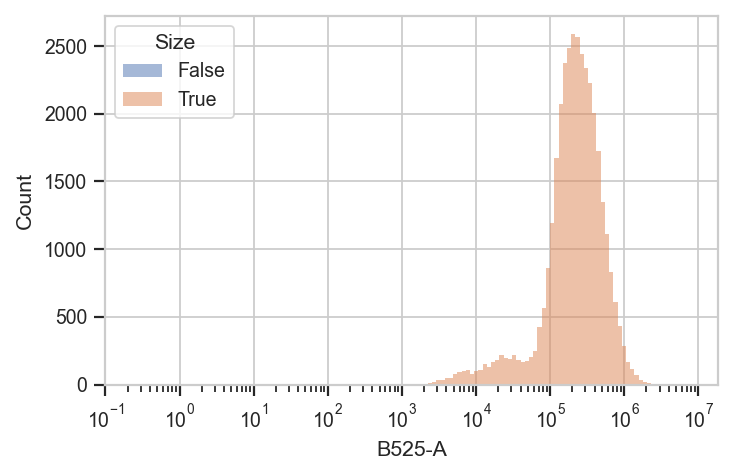

(Strain=='ScCCM021')&(CCM=='0')&(Pathway=='Aroy')&(Sensor=='BenM*')


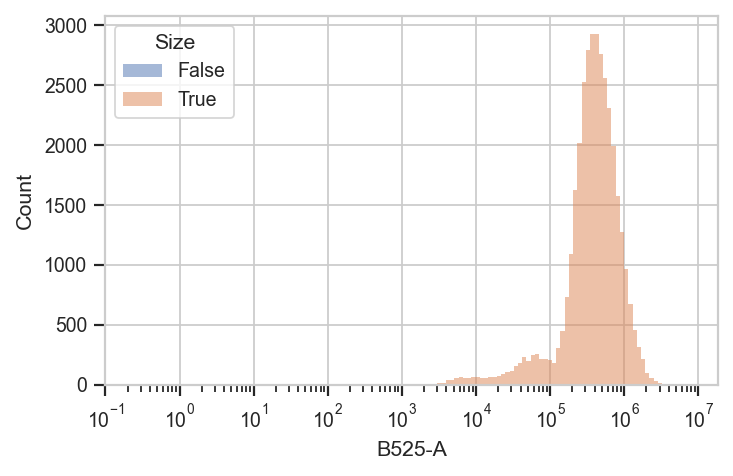

(Strain=='ScCCM023')&(CCM=='0')&(Pathway=='AroyB*')&(Sensor=='BenM*')


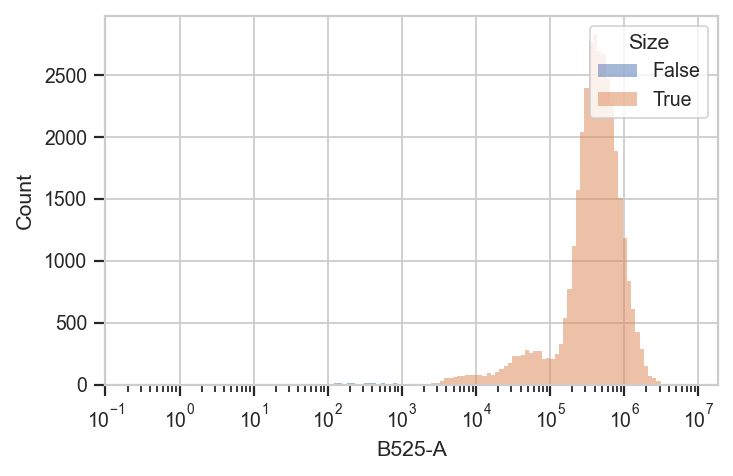

(Strain=='ScCCM025')&(CCM=='0')&(Pathway=='Aroy')&(Sensor=='BenM')


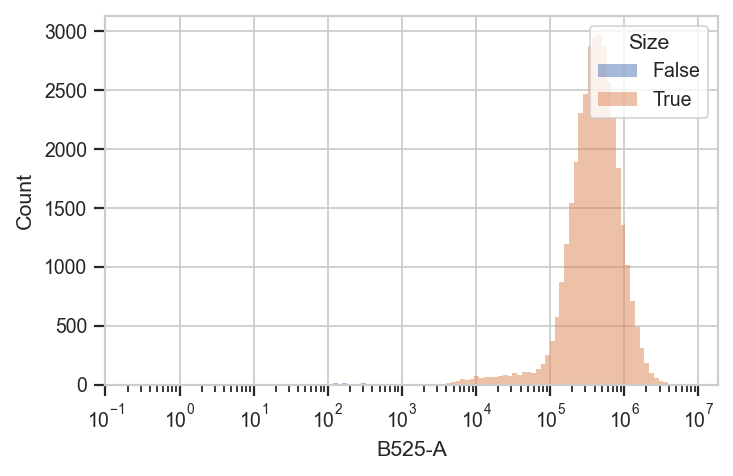

(Strain=='ScCCM026')&(CCM=='0')&(Pathway=='AroyB*')&(Sensor=='BenM')


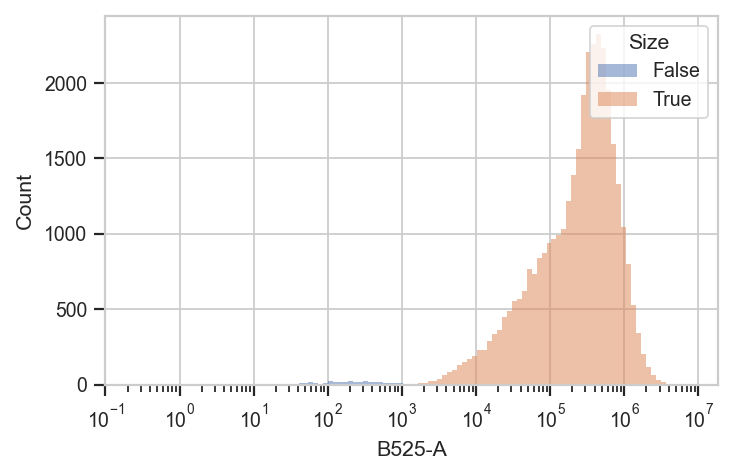

(Strain=='ScCCM027')&(CCM=='0')&(Pathway=='Aroy')&(Sensor=='BenM*')


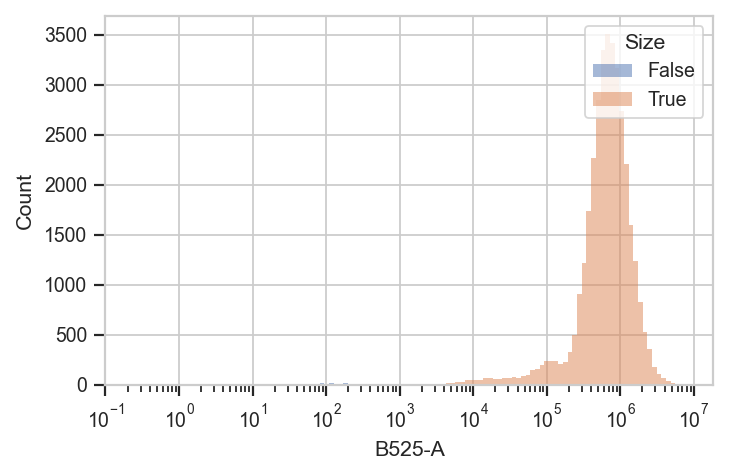

(Strain=='ScCCM028')&(CCM=='0')&(Pathway=='AroyB*')&(Sensor=='BenM*')


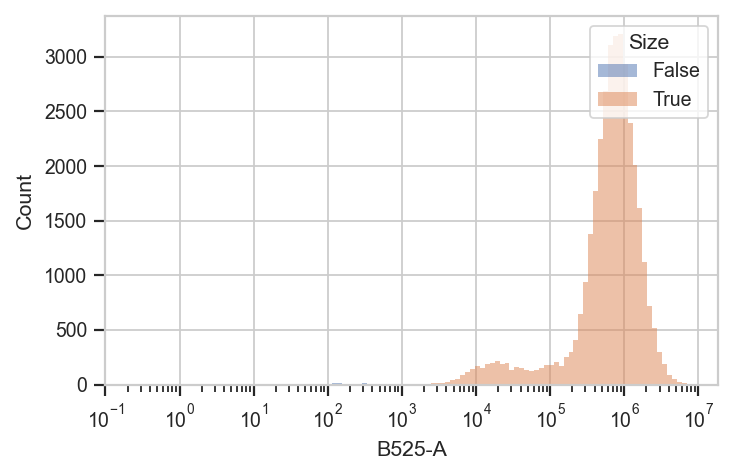

In [81]:
ex= plate2Gated
metrics=['Strain', 'CCM', 'Pathway', 'Sensor']

#we list all individual conditions to define a gate for all individual tubes (same for all replicates)
conditions= np.unique(ex.data[metrics].values.astype(str), axis=0)

for condition in conditions:
    #strain, CCM, Pathway, Sensor = condition
    subset =''
    subset = ['('+cond_name+"=='"+ cond +"')&" for (cond_name, cond) in zip(metrics, condition)]
    subset = ''.join(subset)
    subset = subset[0:-1] #remove last &
    print(subset)
    flow.HistogramView(
                     channel = "B525-A",
                     scale = "log",
                     subset = subset,
                     huefacet='Size').plot(ex)
    plt.show()

[      0.  200000.  400000.  600000.  800000. 1000000.]


/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/ColonyAnalysisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0, 0.5, 'Fluorescence')

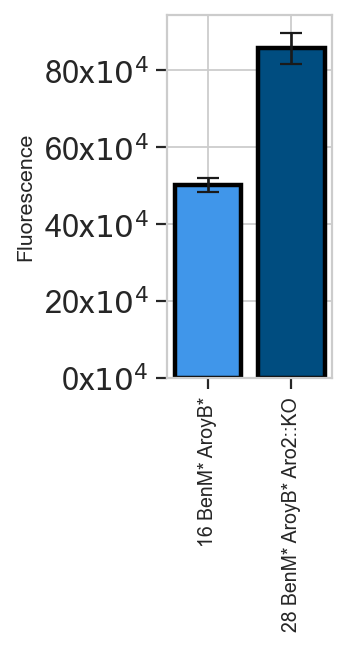

In [96]:
#plot Fluorescence Results
#choose plate
ex= plate2Gated

X=[]
Y=[]
Yerr=[]
tick_names=[]
colors=[]
 ## BenM(MP17_D08) strain at different [CCM]
metric='B525-A'



##add the control  BenM(MP17_D08) AroY.B_P146T
strain = 'ScCCM016'
CCM =0
ABC=[]
for replicate in ['A','B','C']:
    i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True)  & (ex.data['Replicate'] == replicate)
    ABC.append(ex.data[i2plot][metric].mean())
Y.append(ABC)  
tick_names.append('16 BenM* AroyB*')
colors.append(WT_color)




##add the BenM(MP17_D08) AroY.B_P146T  Aro2 KO 
strain = 'ScCCM028'
CCM =0
ABC=[]
for replicate in ['A','B','C']:
    i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True)  & (ex.data['Replicate'] == replicate)
    ABC.append(ex.data[i2plot][metric].mean())
Y.append(ABC)  
tick_names.append('28 BenM* AroyB* Aro2::KO')
colors.append(Top_color)



Y = np.stack(Y)
fig, ax = plt.subplots(figsize=(4/3,3))


ax.bar(np.arange(len(Y)),Y.mean(axis=1),yerr=Y.std(axis=1), color=colors,edgecolor=edgecolor,capsize=5,linewidth =2)

ylabels = ax.get_yticks()
#ax.set_ylim([0*10e5,10*10e4 ])

print(ylabels)
ylabels = [int(y)/10000 for y in ylabels]
ylabels= [str(int(y)) + 'x$10^4$' for y in ylabels]
ax.set_yticklabels(ylabels, size=14)

tick_loc = np.arange(len(Y))
ax.xaxis.set_ticks(tick_loc)
ax.set_xticklabels(tick_names,rotation = 90)
ax.set_ylabel('Fluorescence')
t,p = stats.ttest_ind(a=Y[0,:], b=Y[0,:], equal_var=True)
print('HPLC t,p :',np.round(t,4),np.round(p,8))
#ax.set_xlim([-0.5,13])


## OEx hit confirmation repeat

In [4]:
strain2gene={}
strain2gene['ScCCM88'] = 'GCR1'
strain2gene['ScCCM89'] = 'MET6'
strain2gene['ScCCM90'] = 'GLO4'
strain2gene['ScCCM91'] = 'GSH1'
strain2gene['ScCCM92'] = 'TDH3'
strain2gene['ScCCM94'] = 'FOB1'
strain2gene['ScCCM95'] = 'RIB5'
strain2gene['ScCCM96'] = 'YLL058W'
strain2gene['ScCCM97'] = 'UK'
strain2gene['ScCCM16'] = 'WT'
strain2gene['ScCCMbio16'] = 'IGNORE'
strain2gene['MET14.CCM19']= 'MET14_KO'
strain2gene['MET14']= 'MET14'
strain2gene['LPD1']= 'LPD1'
strain2gene['AIM22']= 'AIM22'
strain2gene['ARG5,6']= 'ARG5,6'
strain2gene['LYS14']= 'LYS14'
strain2gene['PDA1']= 'PDA1'

#reverse dict
gene2strain={}
for s, g in strain2gene.items():
    gene2strain[g]=s
    
## parse HPLC data
data_path= '/Users/paucac/Documents/PhD/CAB/CRISPA/HPLC/CCM/23.5.22/'
HPLC_map = pd.read_csv(data_path+ 'HPLC_map.csv' ).astype(str)
HPLC_map=HPLC_map.iloc[:8, 1:13]



## read OD /GFP readouts in culture before HPLC
path= '/Users/paucac/Documents/PhD/CAB/CRISPA/HPLC/CCM/23.5.22/'
file_name = 'HPLC_OD230522.xlsx'
OD_DF = pd.read_excel(path+ file_name, sheet_name='Plate 1 - Sheet1',skiprows=43).values[::4,2:-1]
GFP_DF= pd.read_excel(path+ file_name, sheet_name='Plate 1 - Sheet1',skiprows=46).values[::4,2:-1]

HPLC_map =  HPLC_map.values.reshape(-1)[0:96]
OD_DF =  OD_DF.reshape(-1)[0:96]
GFP_DF =  GFP_DF.reshape(-1)[0:96]


OD_DF= OD_DF[HPLC_map!='nan']
GFP_DF= GFP_DF[HPLC_map!='nan']
HPLC_map=HPLC_map[HPLC_map!='nan']


In [5]:
data_path= '/Users/paucac/Documents/PhD/CAB/CRISPA/HPLC/CCM/23.5.22/'
HPLC_map = pd.read_csv(data_path+ 'HPLC_map.csv' ).astype(str)
HPLC_map=HPLC_map.iloc[:8, 1:13]



## read OD /GFP readouts in culture before HPLC
path= '/Users/paucac/Documents/PhD/CAB/CRISPA/HPLC/CCM/23.5.22/'
file_name = 'HPLC_OD230522.xlsx'
OD_DF = pd.read_excel(path+ file_name, sheet_name='Plate 1 - Sheet1',skiprows=43).values[::4,2:-1]
GFP_DF= pd.read_excel(path+ file_name, sheet_name='Plate 1 - Sheet1',skiprows=46).values[::4,2:-1]

HPLC_map =  HPLC_map.values.reshape(-1)[0:96]
OD_DF =  OD_DF.reshape(-1)[0:96]
GFP_DF =  GFP_DF.reshape(-1)[0:96]


OD_DF= OD_DF[HPLC_map!='nan']
GFP_DF= GFP_DF[HPLC_map!='nan']
HPLC_map=HPLC_map[HPLC_map!='nan']

strains = [g[:g.index('_')] if '_' in g else g for g in HPLC_map]
genes = [strain2gene[g] if ('std' not in g) and ('BLANK' not in g)  else g for g in strains]
OD= [od for od in OD_DF]
GFP= [gfp for gfp in GFP_DF]

# we incubated all wells for 6 days (except for ScCCM16_A.72H and ScCCM95 which were incubated for 72H)
modif_type = ['KO' if 'MET14' in g else 'OEx' for g in HPLC_map] #solid colony or liquid culture


dilution_factor =2

##load data

columns =['No' ,'Injection_Name','Ret_Time' ,'Area' ,'Height' ,'Amount' ,'Rel_Area','Peak_Type'  ]
hplc_file ='HPLC23.5.22_UV_VIS_4.xlsx'
HPLC_CCM=pd.read_excel(data_path+ hplc_file, skiprows=14, names=columns).astype(str)
HPLC_CCM=HPLC_CCM.iloc[:95,:]
HPLC_CCM=HPLC_CCM.replace('n.a.',0)
HPLC_CCM = HPLC_CCM[HPLC_CCM!='']
# the samples were diluted 8X during sample prep. We remultiply back X8
back_dilute=8


#alphabet match
alphabet={}
for i,L in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    alphabet[L] = i +1
    

HPLC_CCM['gene']=genes
HPLC_CCM['strain']=strains
HPLC_CCM['type']= modif_type 
HPLC_CCM['OD']= OD
HPLC_CCM['GFP']= GFP
HPLC_CCM23522 = HPLC_CCM.copy()

In [20]:
y

array(['59.401', '71.029', '69.661'], dtype='<U6')

YLL058W [59.401 71.029 69.661] 0.0004985534074163182  ***
FOB1 [67.662 67.151 77.479] 0.0002412457593888229  ***
MET6 [41.164 44.296 52.15 ] 0.006199852528168871  **
TDH3 [54.936 48.337 49.923] 0.00039673500819323223  ***
RIB5 [28.489 29.099 26.503] 0.7571471156115993 
GLO4 [48.924 52.212 49.058] 6.02414331011448e-05  ***
GCR1 [51.173 47.525 55.588] 0.0006608916900319257  ***
GSH1 [29.879 32.181 36.971] 0.09880084028137993 
WT [27.197 29.174 28.698] 1.0 


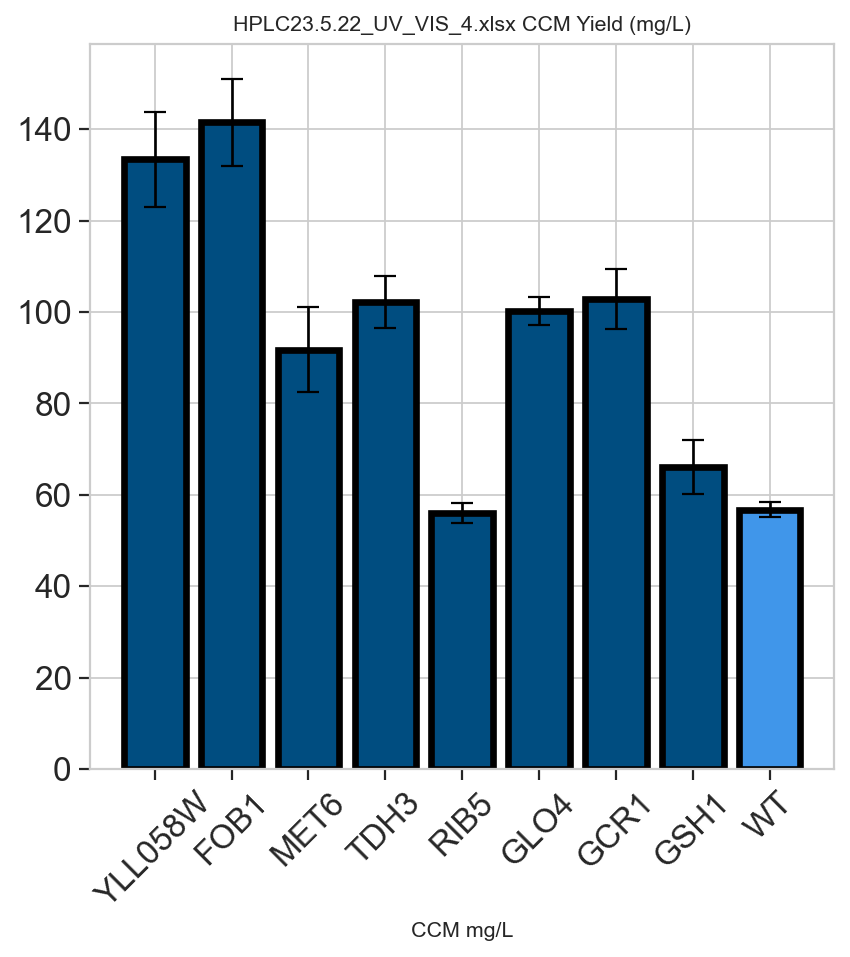

922.3333333333334 133.394
477.0 141.528
590.0 91.74000000000001
464.0 102.13066666666667
147.33333333333334 56.06066666666667
745.0 100.12933333333332
984.0 102.85733333333333
407.3333333333333 66.02066666666667
241.0 56.71266666666666


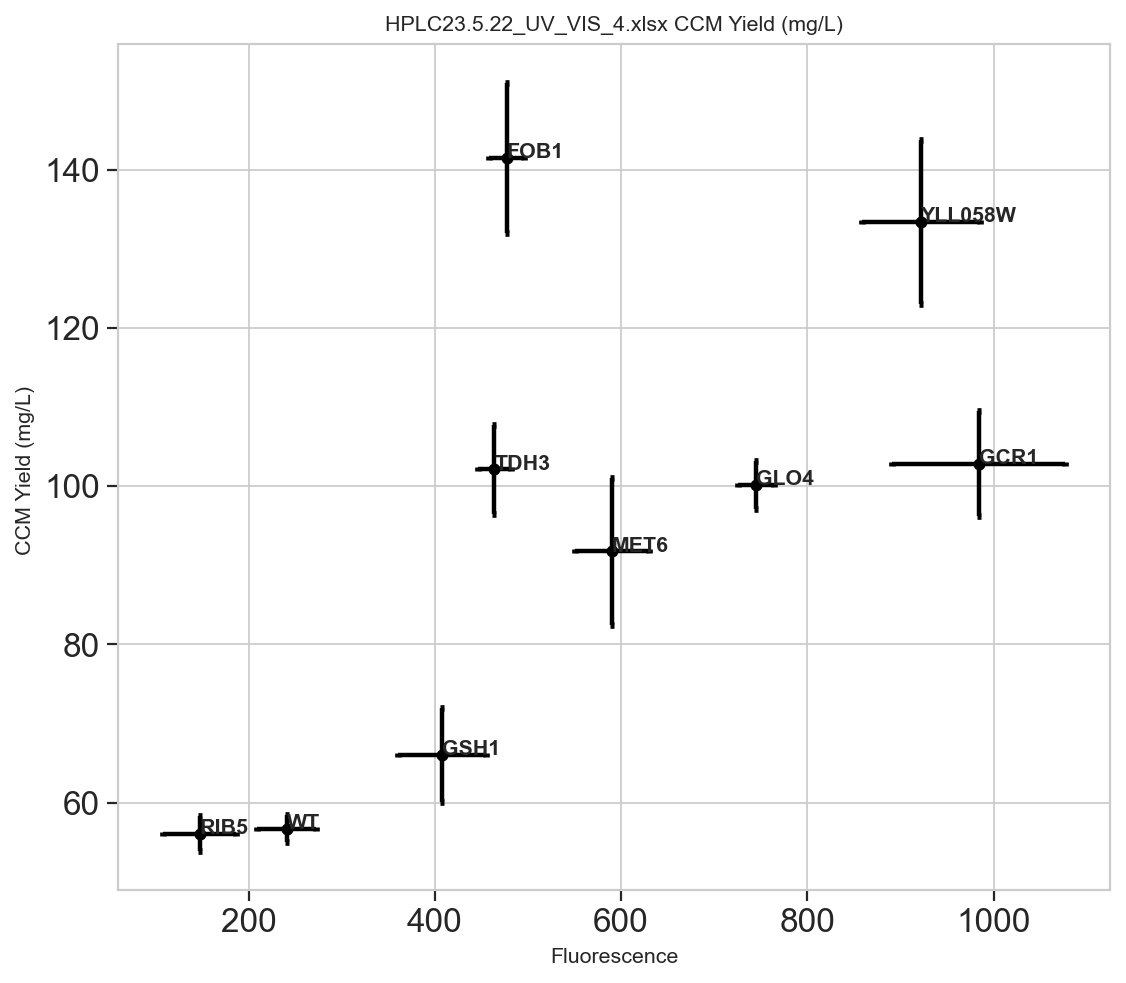

In [24]:
X_YKO=[]
Y_YKO=[]
GFP_YKO= []
genes = ['MET6', 'GCR1', 'GLO4','GSH1','TDH3','VPS8','FOB1','RIB5','YLL058W','ScCCM16']
genes = ['GCR1', 'MET6', 'GLO4', 'GSH1', 'TDH3', 'FOB1', 'RIB5', 'YLL058W',  'WT']
genes = ['YLL058W','FOB1','MET6','TDH3','RIB5', 'GLO4', 'GCR1','GSH1','WT']

i= (HPLC_CCM['gene'].str.contains('WT'))
WT_score = HPLC_CCM['Amount'][i].values.astype(str)
WT_score = [s.replace(',','.') if ',' in s else s for s in WT_score ]
WT_score = np.stack(WT_score  ).astype(float)
WT_gfp_score = HPLC_CCM['GFP'][i].values.astype(str)
WT_gfp_score = np.stack(WT_gfp_score  ).astype(float)

for g in  genes:#4,  3,5,6,4,7,8
    X_YKO.append(g)
    #'time' '6d'/'3d', 
    #'bioreplicate' 1'/'2'
    
    i= (HPLC_CCM['gene'].str.contains(g))#
    #& (HPLC_CCM['type']=='KO')
 
    y = HPLC_CCM['Amount'][i].values.astype(str)
    #this one liner replaces commas to dots 
    y = np.array([s.replace(',','.') if ',' in s else s for s in y ]).astype(float)
    
    #alternative = 'less' if gene in ['ADE12','SNF7','VPS20'] else 'greater'
    gene_score = y[np.isnan(y)==0] #ignore nans
    t, p = ttest_ind(gene_score, WT_score)
    
        
    star = ' *' if p<0.05 else ''
    star = ' **' if p<0.01 else star
    star = ' ***' if p<0.001 else star
    print(g,y,p,star)
    
    gfp = HPLC_CCM['GFP'][i].values
    GFP_YKO.append(gfp)
    Y_YKO.append(y)
    


Y_YKO = np.stack(Y_YKO).astype(float)*dilution_factor
GFP_YKO = np.stack(GFP_YKO).astype(float)




fig, ax = plt.subplots(figsize=(6,6))

colors=[Top_color,Top_color,Top_color,Top_color,Top_color,Top_color,Top_color,Top_color,WT_color]
#ax.bar(np.arange(Y_YKO.shape[0]) ,Y_YKO.mean(axis=1),yerr=Y_YKO.std(axis=1),
   #    color=colors,edgecolor= edgecolor,linewidth=3,ecolor=edgecolor,capsize=5)

ax.bar(np.arange(Y_YKO.shape[0]) ,Y_YKO.mean(axis=1),yerr=Y_YKO.std(axis=1),
       color=colors,edgecolor= edgecolor,linewidth=3,ecolor=edgecolor,capsize=5)


ax.xaxis.set_ticks(np.arange(Y_YKO.shape[0]))



ax.set_title('CCM Yield (mg/L) ')

ax.tick_params(axis='both', which='major', labelsize=5)
ax.set_xlabel('CCM mg/L')
ax.set_xticklabels(X_YKO,rotation = 45, size=10)
#ax.set_xlim([0, 400])
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)

ax.set_title(hplc_file +' CCM Yield (mg/L)')
plt.show()


fig, ax = plt.subplots(figsize=(8,7))

colors=[Top_color,Top_color,Top_color,Top_color,Top_color,Top_color,Top_color,Top_color,WT_color]
colors=[Top_color,Top_color,Top_color,Top_color,Top_color,Top_color,Top_color,Top_color, WT_color]

#ax.bar(np.arange(Y_YKO.shape[0]) ,Y_YKO.mean(axis=1),yerr=Y_YKO.std(axis=1),
   #    color=colors,edgecolor= edgecolor,linewidth=3,ecolor=edgecolor,capsize=5)

ax.errorbar(GFP_YKO.mean(axis=1) ,Y_YKO.mean(axis=1), xerr= GFP_YKO.std(axis=1),yerr=Y_YKO.std(axis=1),
            c=[0,0,0], alpha=1, fmt=".",capsize=1, elinewidth=2, markeredgewidth=3)


#ax.xaxis.set_ticks(np.arange(Y_YKO.shape[0]))

for (gene,x,y) in  zip(X_YKO ,list(GFP_YKO.mean(axis=1)),list(Y_YKO.mean(axis=1))):
    print(x,y)
    adjust = -0.00010 if gene in ['ARG5,6'] else 0
    ax.annotate(gene, (x,y),weight='bold') 

ax.set_title('Liquid Fluo HPLC correlation')

ax.tick_params(axis='both', which='major', labelsize=5)
ax.set_xlabel('Fluorescence')
ax.set_ylabel('CCM Yield (mg/L) ')
#ax.set_xlim([0, 400])
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)

ax.set_title(hplc_file +' CCM Yield (mg/L)')
plt.show()